# **Student dropout in higher education**  🎓 ❌
#by Florencia Ogorinsky


$\quad \LARGE \text{This project analyzes key factors that influence university student dropout, leveraging a dataset from Kaggle. }\\[1cm]$
$\quad \LARGE \text{The ultimate goal is to understand which variables most significantly impact student dropout,}\\[1cm]$
$\quad \LARGE \text{and how these factors vary across different academic programs.}$

# **Web scrapping**

In [1]:
import requests
from bs4 import BeautifulSoup
import textwrap
from IPython.display import display, HTML

def scrape_intro_from_heading(url, width=160):
    headers = {'User-Agent': 'Mozilla/5.0'}
    response = requests.get(url, headers=headers)
    soup = BeautifulSoup(response.content, 'html.parser')

    intro_heading = soup.find('h2', string='Introduction')
    if intro_heading:
        paragraphs = []
        for sibling in intro_heading.find_next_siblings():
            if sibling.name == 'p':
                paragraphs.append(sibling.get_text(strip=True))
            elif sibling.name == 'h2':
                break

        wrapped_paragraphs = [
            textwrap.fill(p, width=width, initial_indent='    ', subsequent_indent='    ')
            for p in paragraphs
        ]
        full_text = '\n\n'.join(wrapped_paragraphs)

        cut_phrase = "All the theoretical information addressed so far"
        if cut_phrase in full_text:
            full_text = full_text.split(cut_phrase)[0].strip()

        # HTML Formatting with left-aligned title
        styled_intro = (
            "<div style='background-color:#F0F8FF; padding: 20px; border: 2px solid #5F9EA0; "
            "border-radius: 10px; font-family: Arial, sans-serif;'>"
            "<h2 style='color: #2F4F4F; font-size: 24px; text-align: left;'>INTRODUCTION</h2>"  # Title aligned to the left
            "<div style='color: #4B0082; font-size: 14px; line-height: 1.6;'>"
            + full_text.replace('\n', '<br><br>') +
            "</div></div>"
        )

        display(HTML(styled_intro))
        return full_text

    return "<div style='color: red;'>❌ 'Introduction' section not found.</div>"

# Test
url = "https://pmc.ncbi.nlm.nih.gov/articles/PMC11561383/"
scrape_intro_from_heading(url)


'University dropout is a multifaceted problem that affects both educational institutions and society at large. This phenomenon is influenced by several key\n    factors. Inadequate vocational guidance can lead to poor career choices, resulting in a disconnection from studies and, ultimately, dropout. Providing\n    proper career guidance before the start of studies allows for informed decisions, reducing the risk of dropout. Academic performance also plays a crucial\n    role, as students with better grades are less likely to abandon their studies. However, academic performance alone is not sufficient to ensure retention if\n    it is not addressed alongside other factors (Bernardo et al., 2017;Chalela-Naffah et al., 2020;Kim & Kim, 2018;Santos-Villalba et al., 2023;Schmidt et al.,\n    2023).\n\n    Socioeconomic status is another critical determinant, as financial difficulties can force students to abandon their studies to work or attend to family\n    responsibilities. Finally, inst

# **Data pre-processing**

In [2]:
import kagglehub
import pandas as pd
import os

path = kagglehub.dataset_download("thedevastator/higher-education-predictors-of-student-retention")

print("Path to dataset files:", path)

csv_file = None
for filename in os.listdir(path):
    if filename.endswith(".csv"):
        csv_file = os.path.join(path, filename)
        break

data = pd.read_csv(csv_file)

data.info()

Path to dataset files: /kaggle/input/higher-education-predictors-of-student-retention
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nacionality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification          

# **Full description of columns and encodings is available on the [UCI repository page](https://archive.ics.uci.edu/dataset/697/predict+students+dropout+and+academic+success)**

In [3]:
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nacionality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


# **Checking and Handling missing data**

In [4]:
missing_data=data.isnull().sum()
print(missing_data)

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance                        0
Previous qualification                            0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrollment                                 0
International                                     0
Curricular u

# **Removing duplicate rows**

In [5]:
data=data.drop_duplicates()
print(data.duplicated().sum())

0


$\quad \LARGE \text{No need to fix structural errors because we only have int and Categorical columns, }\\[1cm]$
$\quad \LARGE \text{we dont have columns like dates where we would need to fix}\\[1cm]$

In [6]:
print(f'Target values:', data['Target'].unique())

Target values: ['Dropout' 'Graduate' 'Enrolled']


# **Distribution of Target Variable**

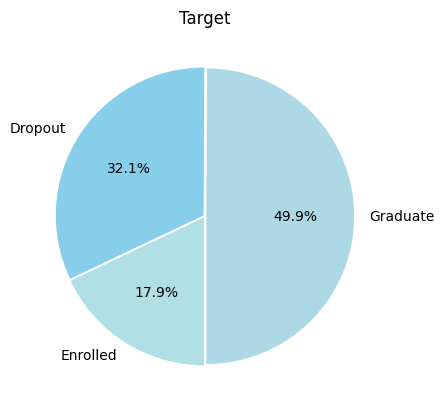

In [7]:
import matplotlib.pyplot as plt

plt.pie(x = data['Target'].value_counts(),
        labels = data['Target'].value_counts().index.to_list(),
        colors = ['#add8e6','#87ceeb','#b0e0e6'],
        autopct='%1.1f%%',
        explode = [0.01, 0.01, 0.01],
        startangle=-90)
plt.title('Target')
plt.show()

In [8]:
data.columns

Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)

# **Renaming columns for clarity**

In [9]:
data.rename(columns = {'Nacionality':'Nationality'}, inplace = True)

In [10]:
round(data.describe(),3)

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP
count,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,...,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000,4424.000
mean,1.179,6.887,1.728,9.899,0.891,2.531,1.255,12.322,16.455,7.318,...,0.138,0.542,6.232,8.063,4.436,10.230,0.150,11.566,1.228,0.002
std,0.606,5.299,1.314,4.332,0.312,3.964,1.748,9.026,11.045,3.998,...,0.691,1.919,2.196,3.948,3.015,5.211,0.754,2.664,1.383,2.270
min,1.000,1.000,0.000,1.000,0.000,1.000,1.000,1.000,1.000,1.000,...,0.000,0.000,0.000,0.000,0.000,0.000,0.000,7.600,-0.800,-4.060
25%,1.000,1.000,1.000,6.000,1.000,1.000,1.000,2.000,3.000,5.000,...,0.000,0.000,5.000,6.000,2.000,10.750,0.000,9.400,0.300,-1.700
50%,1.000,8.000,1.000,10.000,1.000,1.000,1.000,13.000,14.000,6.000,...,0.000,0.000,6.000,8.000,5.000,12.200,0.000,11.100,1.400,0.320
75%,1.000,12.000,2.000,13.000,1.000,1.000,1.000,22.000,27.000,10.000,...,0.000,0.000,7.000,10.000,6.000,13.333,0.000,13.900,2.600,1.790
max,6.000,18.000,9.000,17.000,1.000,17.000,21.000,29.000,34.000,32.000,...,12.000,19.000,23.000,33.000,20.000,18.571,12.000,16.200,3.700,3.510


# **Encode Target Variable for Modeling**

In [11]:
data['Target'] = data['Target'].map({
    'Dropout':0,
    'Enrolled':1,
    'Graduate':2
})

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nationality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

# **Assess Distribution Shape of Numerical Variables**

In [13]:
import pandas as pd
from scipy.stats import skew, kurtosis

# filter numerical col
numerical_cols = data.select_dtypes(include=['int64', 'float64']).columns

skewness = data[numerical_cols].skew()
kurtosis_values = data[numerical_cols].kurtosis()


print("Skewness:\n", skewness)
print("\nKurtosis:\n", kurtosis_values)



Skewness:
 Marital status                                    4.399764
Application mode                                  0.121696
Application order                                 1.881050
Course                                           -0.189557
Daytime/evening attendance                       -2.507238
Previous qualification                            2.405934
Nationality                                       7.282730
Mother's qualification                           -0.097197
Father's qualification                           -0.291740
Mother's occupation                               2.231227
Father's occupation                               4.058407
Displaced                                        -0.194468
Educational special needs                         9.154976
Debtor                                            2.434652
Tuition fees up to date                          -2.349054
Gender                                            0.621279
Scholarship holder                           

## **Columns Requiring Correction (Outlier Treatment)**

**Columns with High Skewness and Kurtosis:**

| Column Name                           | Skewness | Kurtosis | Notes                                  |
|----------------------------------------|----------|----------|----------------------------------------|
| Educational special needs             | 9.15     | 81.85    | Very high skew, extreme outliers       |
| Nationality                           | 7.28     | 54.04    | Very high skew, heavy tails/outliers  |
| Mother's occupation                     | 2.23     | 10.74    | Moderate skew, significant outliers  |
| Father's occupation                     | 4.06     | 25.65    | High skew, heavy tails/outliers      |
| Curricular units 1st sem (without evals) | 8.21     | 89.86    | Very high skew, extreme outliers       |
| Curricular units 2nd sem (without evals) | 7.27     | 66.81    | Very high skew, extreme outliers       |

**Key Considerations:**

* **Impact:** High skewness and kurtosis indicate that these columns have distributions that are far from normal. This can negatively affect the performance of many machine learning models.
* **Outliers:** The extremely high kurtosis values suggest the presence of significant outliers, which are likely driving the skewness.
* **Action:** These columns will require outlier treatment and potentially transformations to make their distributions more suitable for modeling.

# **Normalizing data as needed**

In [14]:
import pandas as pd
import numpy as np
from scipy.stats import boxcox
from sklearn.preprocessing import PowerTransformer
from sklearn.impute import SimpleImputer


numeric_cols = data.select_dtypes(include=[np.number]).columns

# imputing outliers with mean
def impute_outliers(df, numeric_cols, strategy='mean'):
    for col in numeric_cols:

        z_scores = (df[col] - df[col].mean()) / df[col].std()

        # defining outliers (z > 3)
        outliers = np.abs(z_scores) > 3

        # imputing with mean or median
        if strategy == 'mean':
            imputer = SimpleImputer(strategy='mean')
        elif strategy == 'median':
            imputer = SimpleImputer(strategy='median')

        # replace outliers
        df.loc[outliers, col] = imputer.fit_transform(df[[col]])[outliers]

    return df

# imputing with mean
data_imputed_mean = impute_outliers(data.copy(), numeric_cols, strategy='mean')

# function for log-transform for high skewness columns
def log_transform(df, numeric_cols):
    for col in numeric_cols:
        # verify if high skewness
        skew = df[col].skew()
        if skew > 1 or skew < -1:
            # apply log transform
            df[col] = np.log(df[col] + abs(df[col].min()) + 1e-9)
    return df


data_log_transformed = log_transform(data_imputed_mean.copy(), numeric_cols)

# Box cox if not positive values
def boxcox_transform(df, numeric_cols):
    for col in numeric_cols:
        # make sure positive values
        min_value = df[col].min()
        if min_value <= 0:
            df[col] = df[col] + abs(min_value) + 1e-9
        # Apply Box-Cox
        df[col], _ = boxcox(df[col])
    return df


data_boxcox_transformed = boxcox_transform(data_log_transformed.copy(), numeric_cols)


print("\nData con imputación de outliers, log-transform y Box-Cox aplicado:")
print(data_boxcox_transformed.head())



Data con imputación de outliers, log-transform y Box-Cox aplicado:
   Marital status  Application mode  Application order     Course  \
0      -18.944509          2.924277         613.961417   0.987344   
1      -18.944509          2.398674         515.277354   9.475392   
2      -18.944509          0.000000         613.961417   3.868944   
3      -18.944509          2.924277         556.566258  13.150991   
4        0.049471          3.749710         515.277354   1.957758   

   Daytime/evening attendance  Previous qualification  Nationality  \
0                    5.748820               -1.089766 -5566.222984   
1                    5.748820               -1.089766 -5566.222984   
2                    5.748820               -1.089766 -5566.222984   
3                    5.748820               -1.089766 -5566.222984   
4                   -2.595089               -1.089766 -5566.222984   

   Mother's qualification  Father's qualification  Mother's occupation  ...  \
0                

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 35 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance                      4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Nationality                                     4424 non-null   int64  
 7   Mother's qualification                          4424 non-null   int64  
 8   Father's qualification                          4424 non-null   int64  
 9   Mother's occupation                      

In [16]:
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2


In [17]:

print("Skewness before transformation:")
print(data[numeric_cols].skew())


print("\nSkewness after imputation and log-transform:")
print(data_log_transformed[numeric_cols].skew())


print("\nSkewness after transformation Box-Cox:")
print(data_boxcox_transformed[numeric_cols].skew())



Skewness before transformation:
Marital status                                    4.399764
Application mode                                  0.121696
Application order                                 1.881050
Course                                           -0.189557
Daytime/evening attendance                       -2.507238
Previous qualification                            2.405934
Nationality                                       7.282730
Mother's qualification                           -0.097197
Father's qualification                           -0.291740
Mother's occupation                               2.231227
Father's occupation                               4.058407
Displaced                                        -0.194468
Educational special needs                         9.154976
Debtor                                            2.434652
Tuition fees up to date                          -2.349054
Gender                                            0.621279
Scholarship holder      

# **Visualize Distribution Transformations**

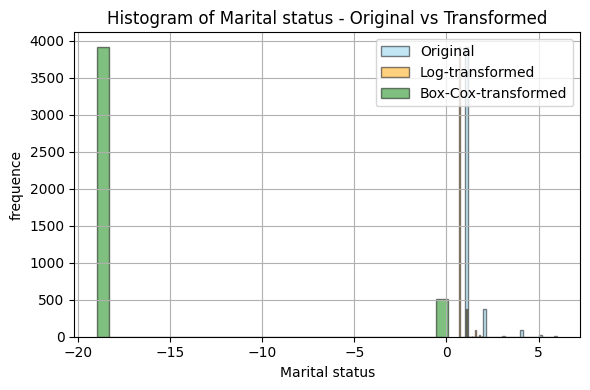

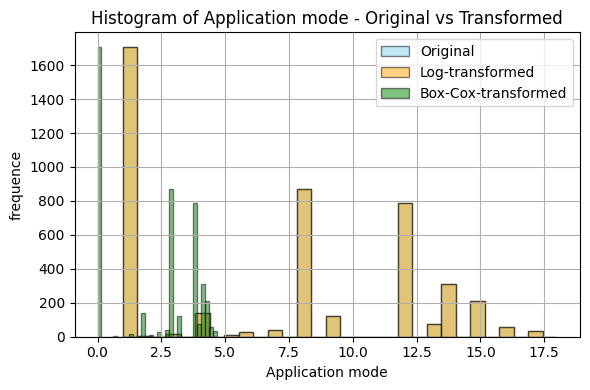

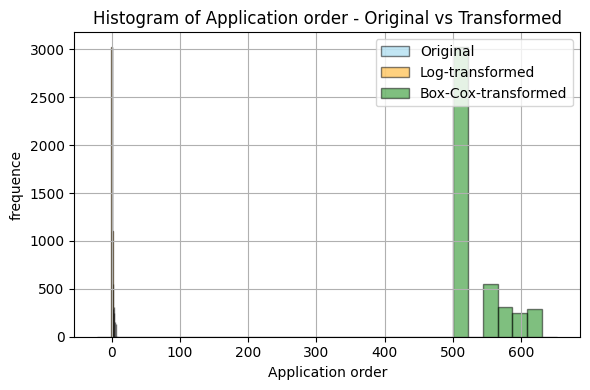

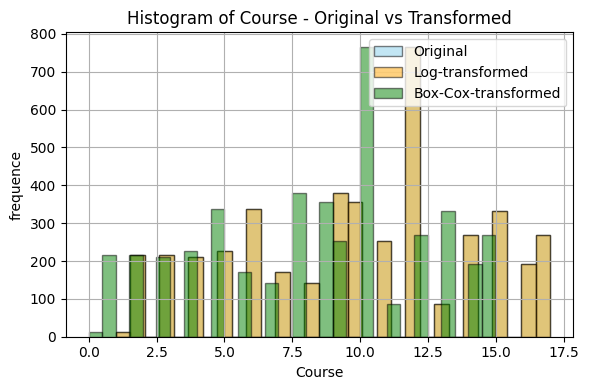

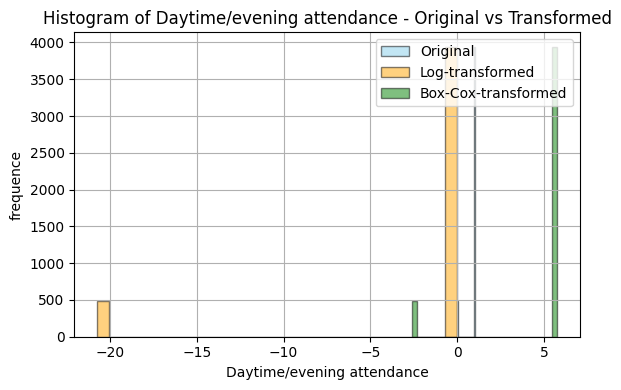

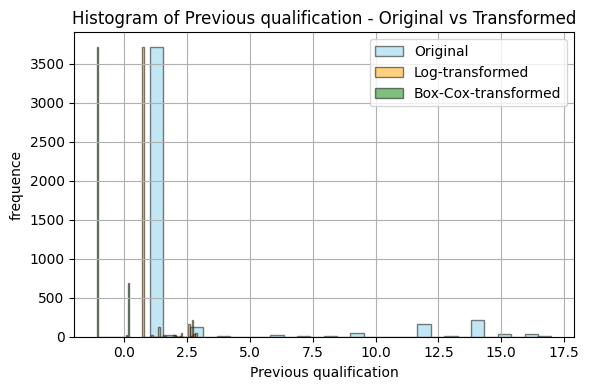

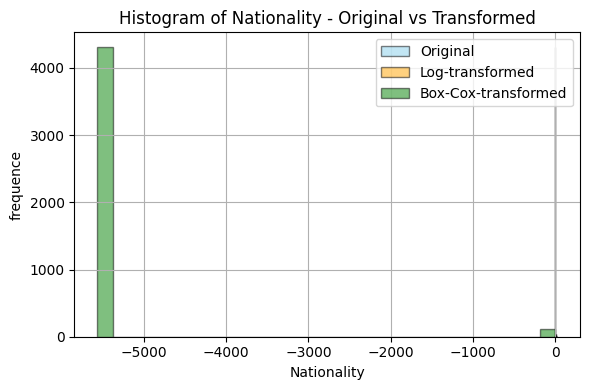

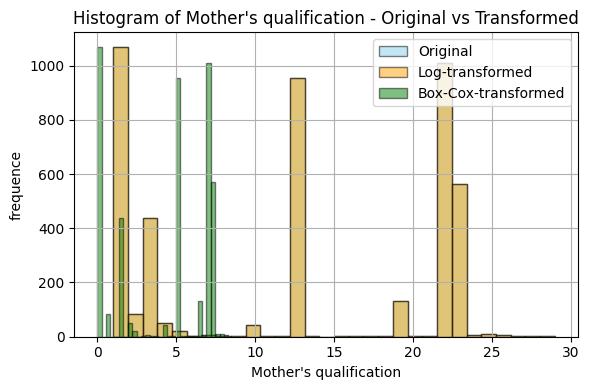

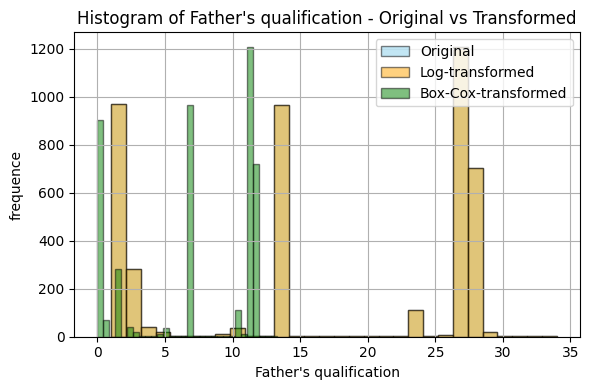

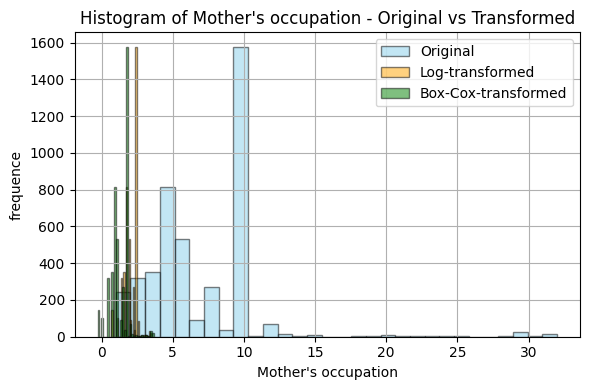

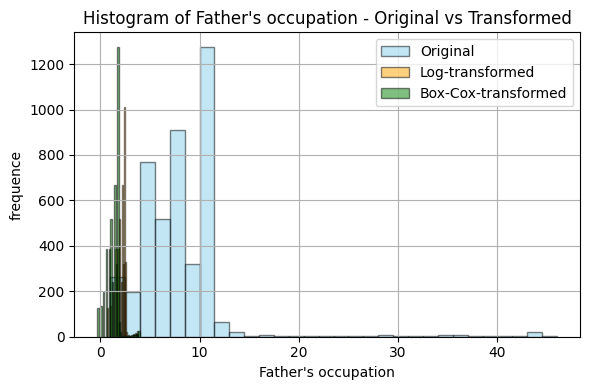

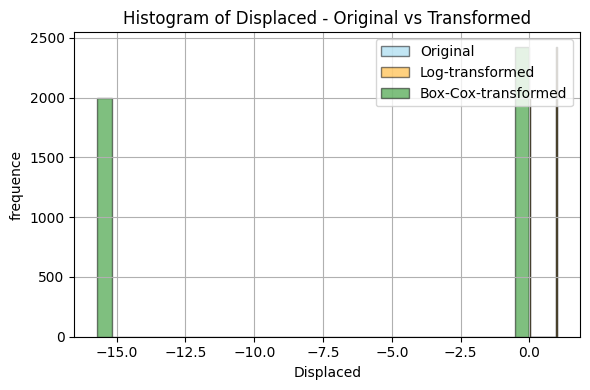

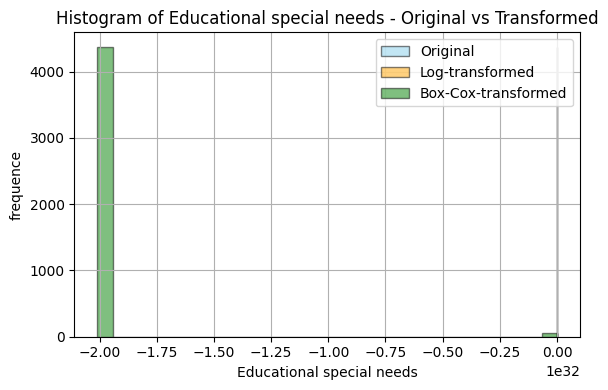

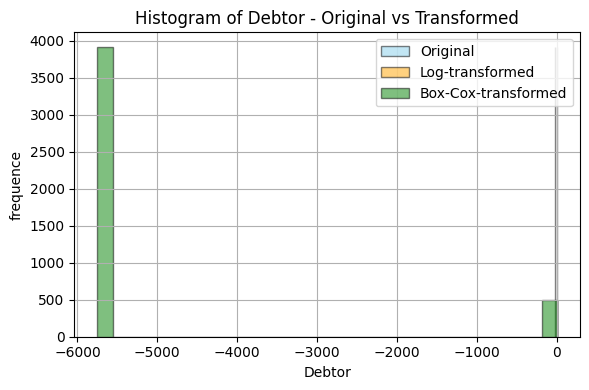

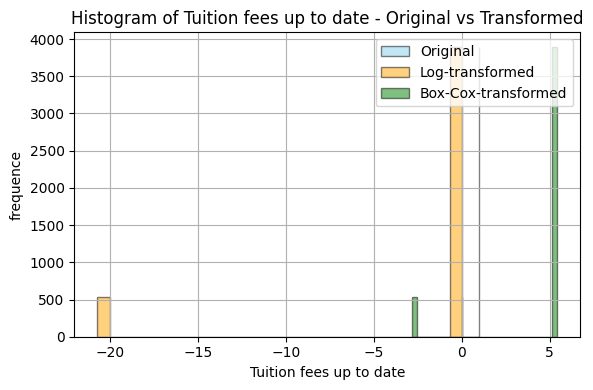

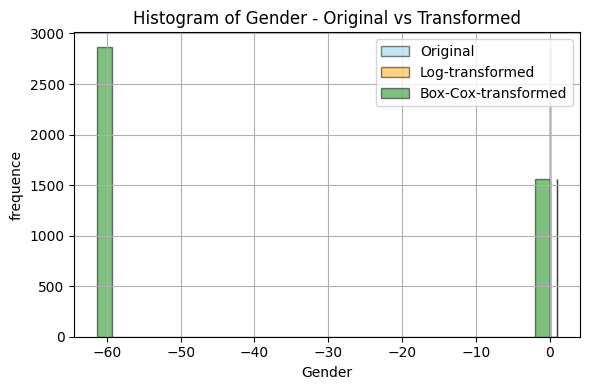

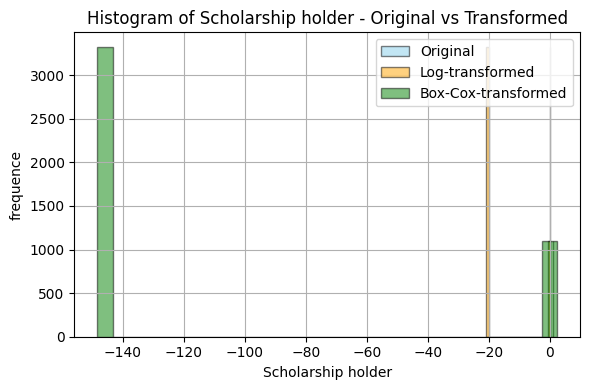

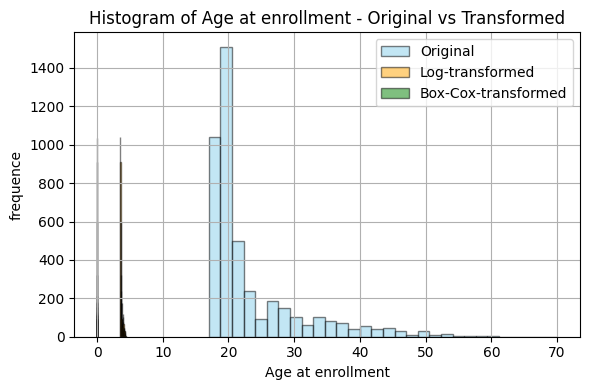

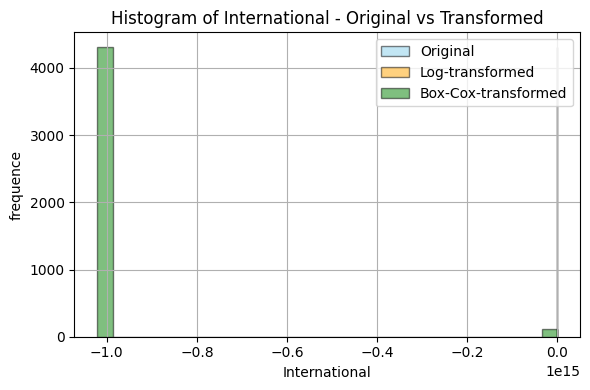

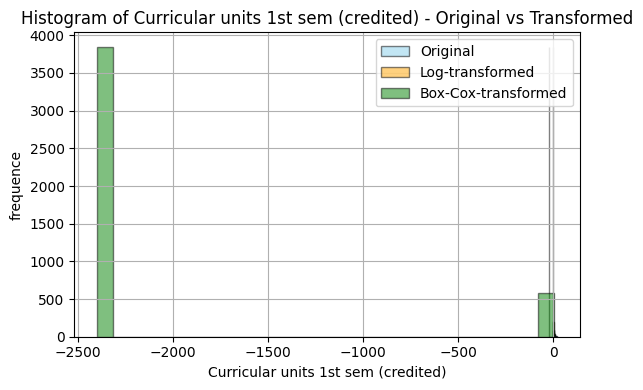

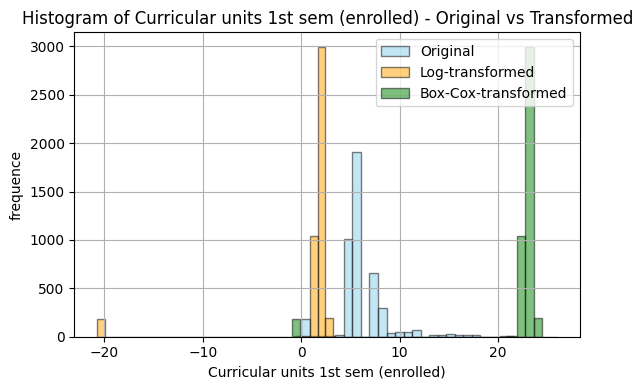

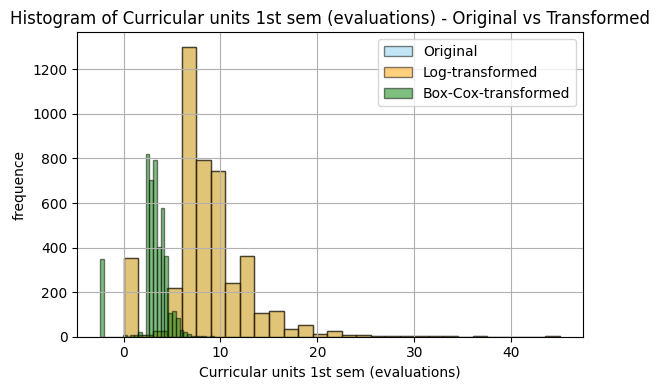

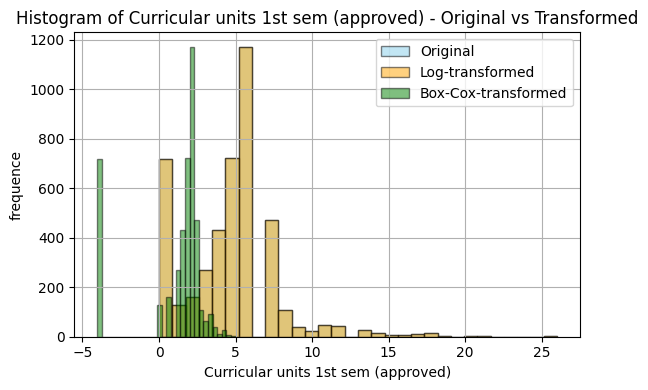

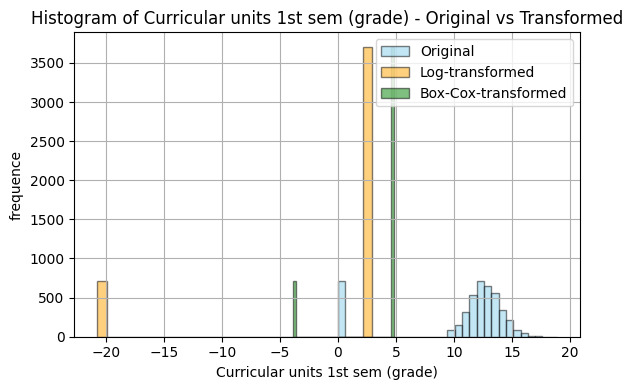

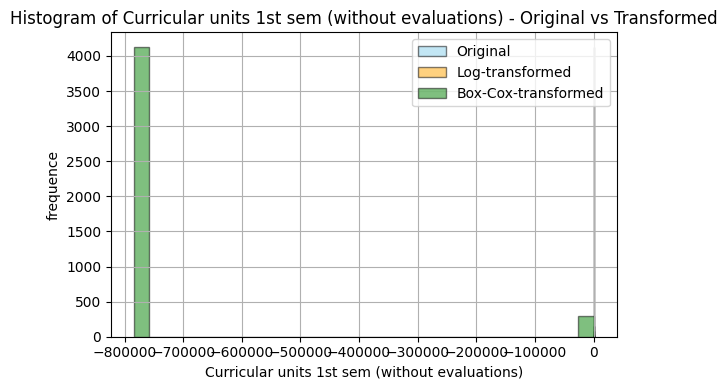

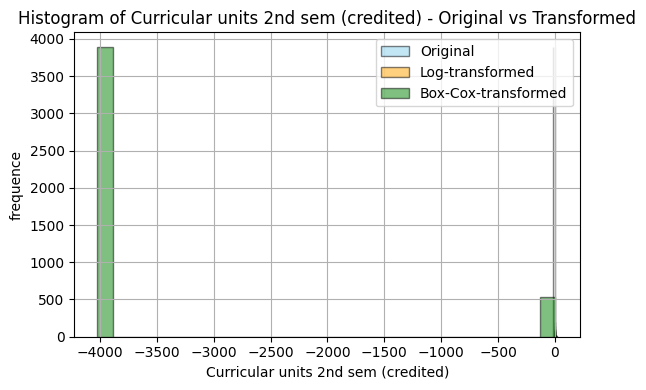

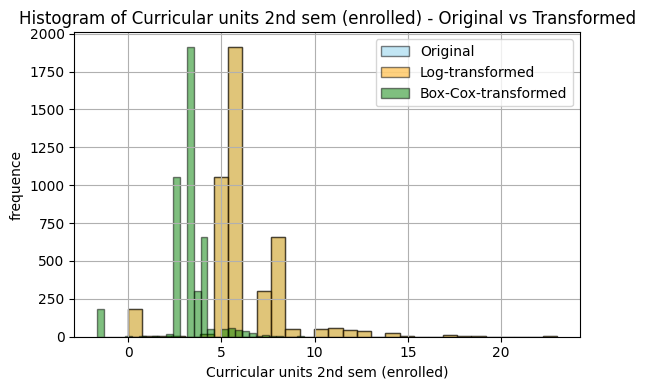

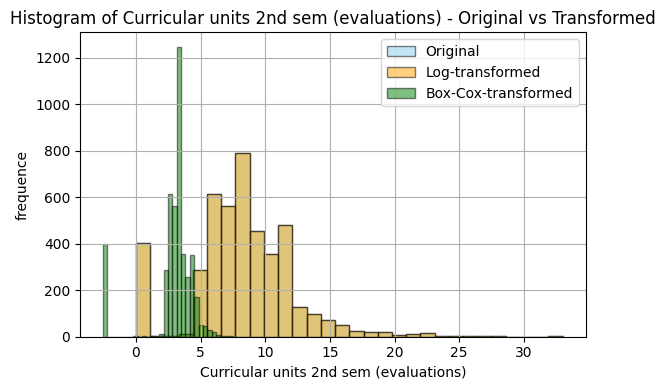

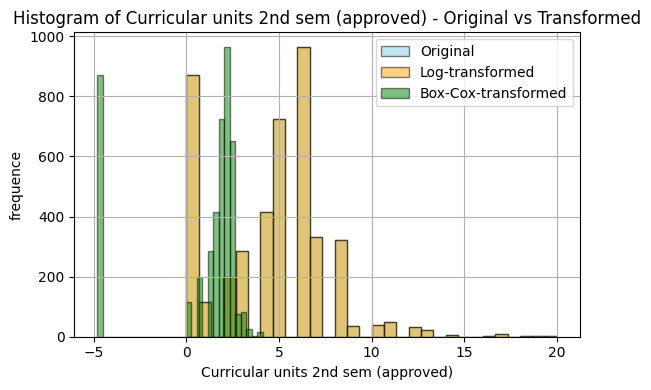

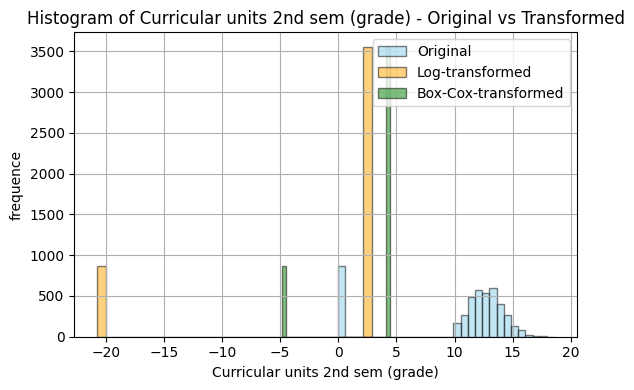

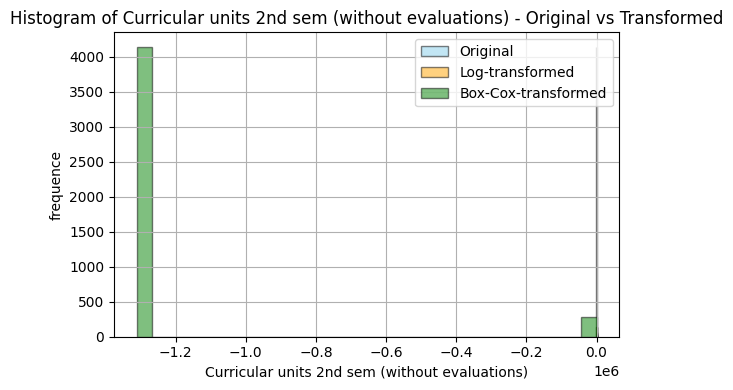

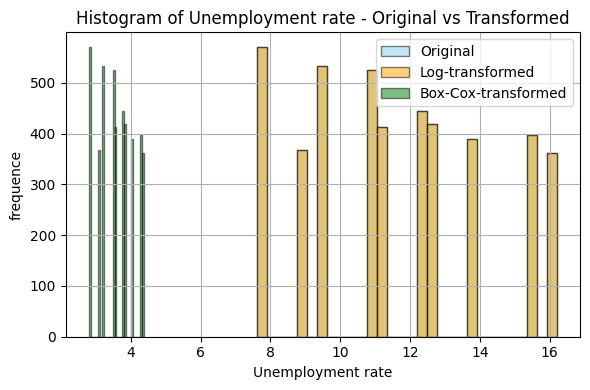

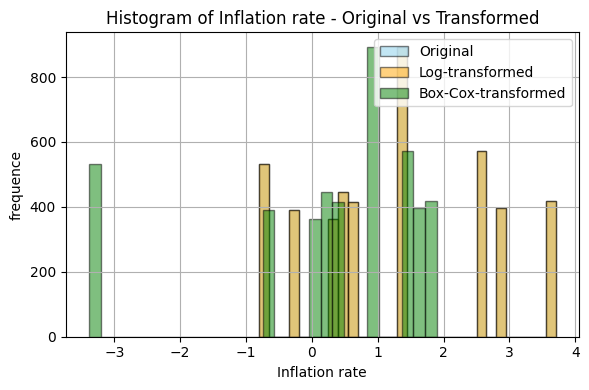

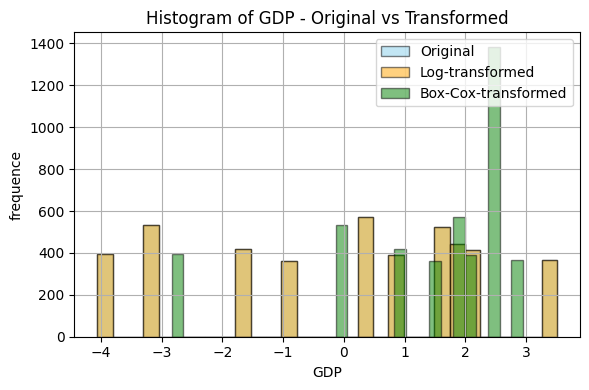

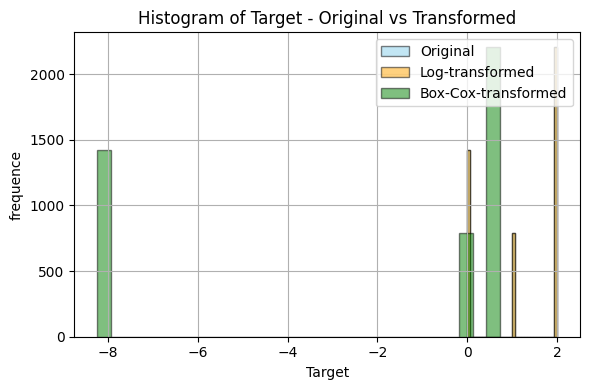

In [18]:
import matplotlib.pyplot as plt

# list of transformed columns
columns_to_plot = [col for col in numeric_cols if col in data_log_transformed.columns]

# Histogram
for col in columns_to_plot:
    if col in data_log_transformed.columns and col in data_boxcox_transformed.columns:
        # Original
        plt.figure(figsize=(6, 4))
        plt.hist(data[col], bins=30, color='skyblue', edgecolor='black', alpha=0.5, label='Original')

        # Log-transformed
        plt.hist(data_log_transformed[col], bins=30, color='orange', edgecolor='black', alpha=0.5, label='Log-transformed')

        # Box-Cox-transformed
        plt.hist(data_boxcox_transformed[col], bins=30, color='green', edgecolor='black', alpha=0.5, label='Box-Cox-transformed')

        plt.title(f'Histogram of {col} - Original vs Transformed')
        plt.xlabel(col)
        plt.ylabel('frequence')
        plt.legend(loc='upper right')
        plt.grid(True)
        plt.tight_layout()
        plt.show()


# **Correlation**

In [19]:
# Calculate the correlation of each numerical column with the "Target" column
target_corr = data.corr()["Target"]
sorted_target_corr = target_corr.sort_values(ascending=False)
# Print the correlation values with respect to "Target"
print(sorted_target_corr)

Target                                            1.000000
Curricular units 2nd sem (approved)               0.624157
Curricular units 2nd sem (grade)                  0.566827
Curricular units 1st sem (approved)               0.529123
Curricular units 1st sem (grade)                  0.485207
Tuition fees up to date                           0.409827
Scholarship holder                                0.297595
Curricular units 2nd sem (enrolled)               0.175847
Curricular units 1st sem (enrolled)               0.155974
Displaced                                         0.113986
Curricular units 2nd sem (evaluations)            0.092721
Application order                                 0.089791
Daytime/evening attendance                        0.075107
Curricular units 2nd sem (credited)               0.054004
Father's occupation                               0.051702
Mother's occupation                               0.048424
Curricular units 1st sem (credited)               0.0481

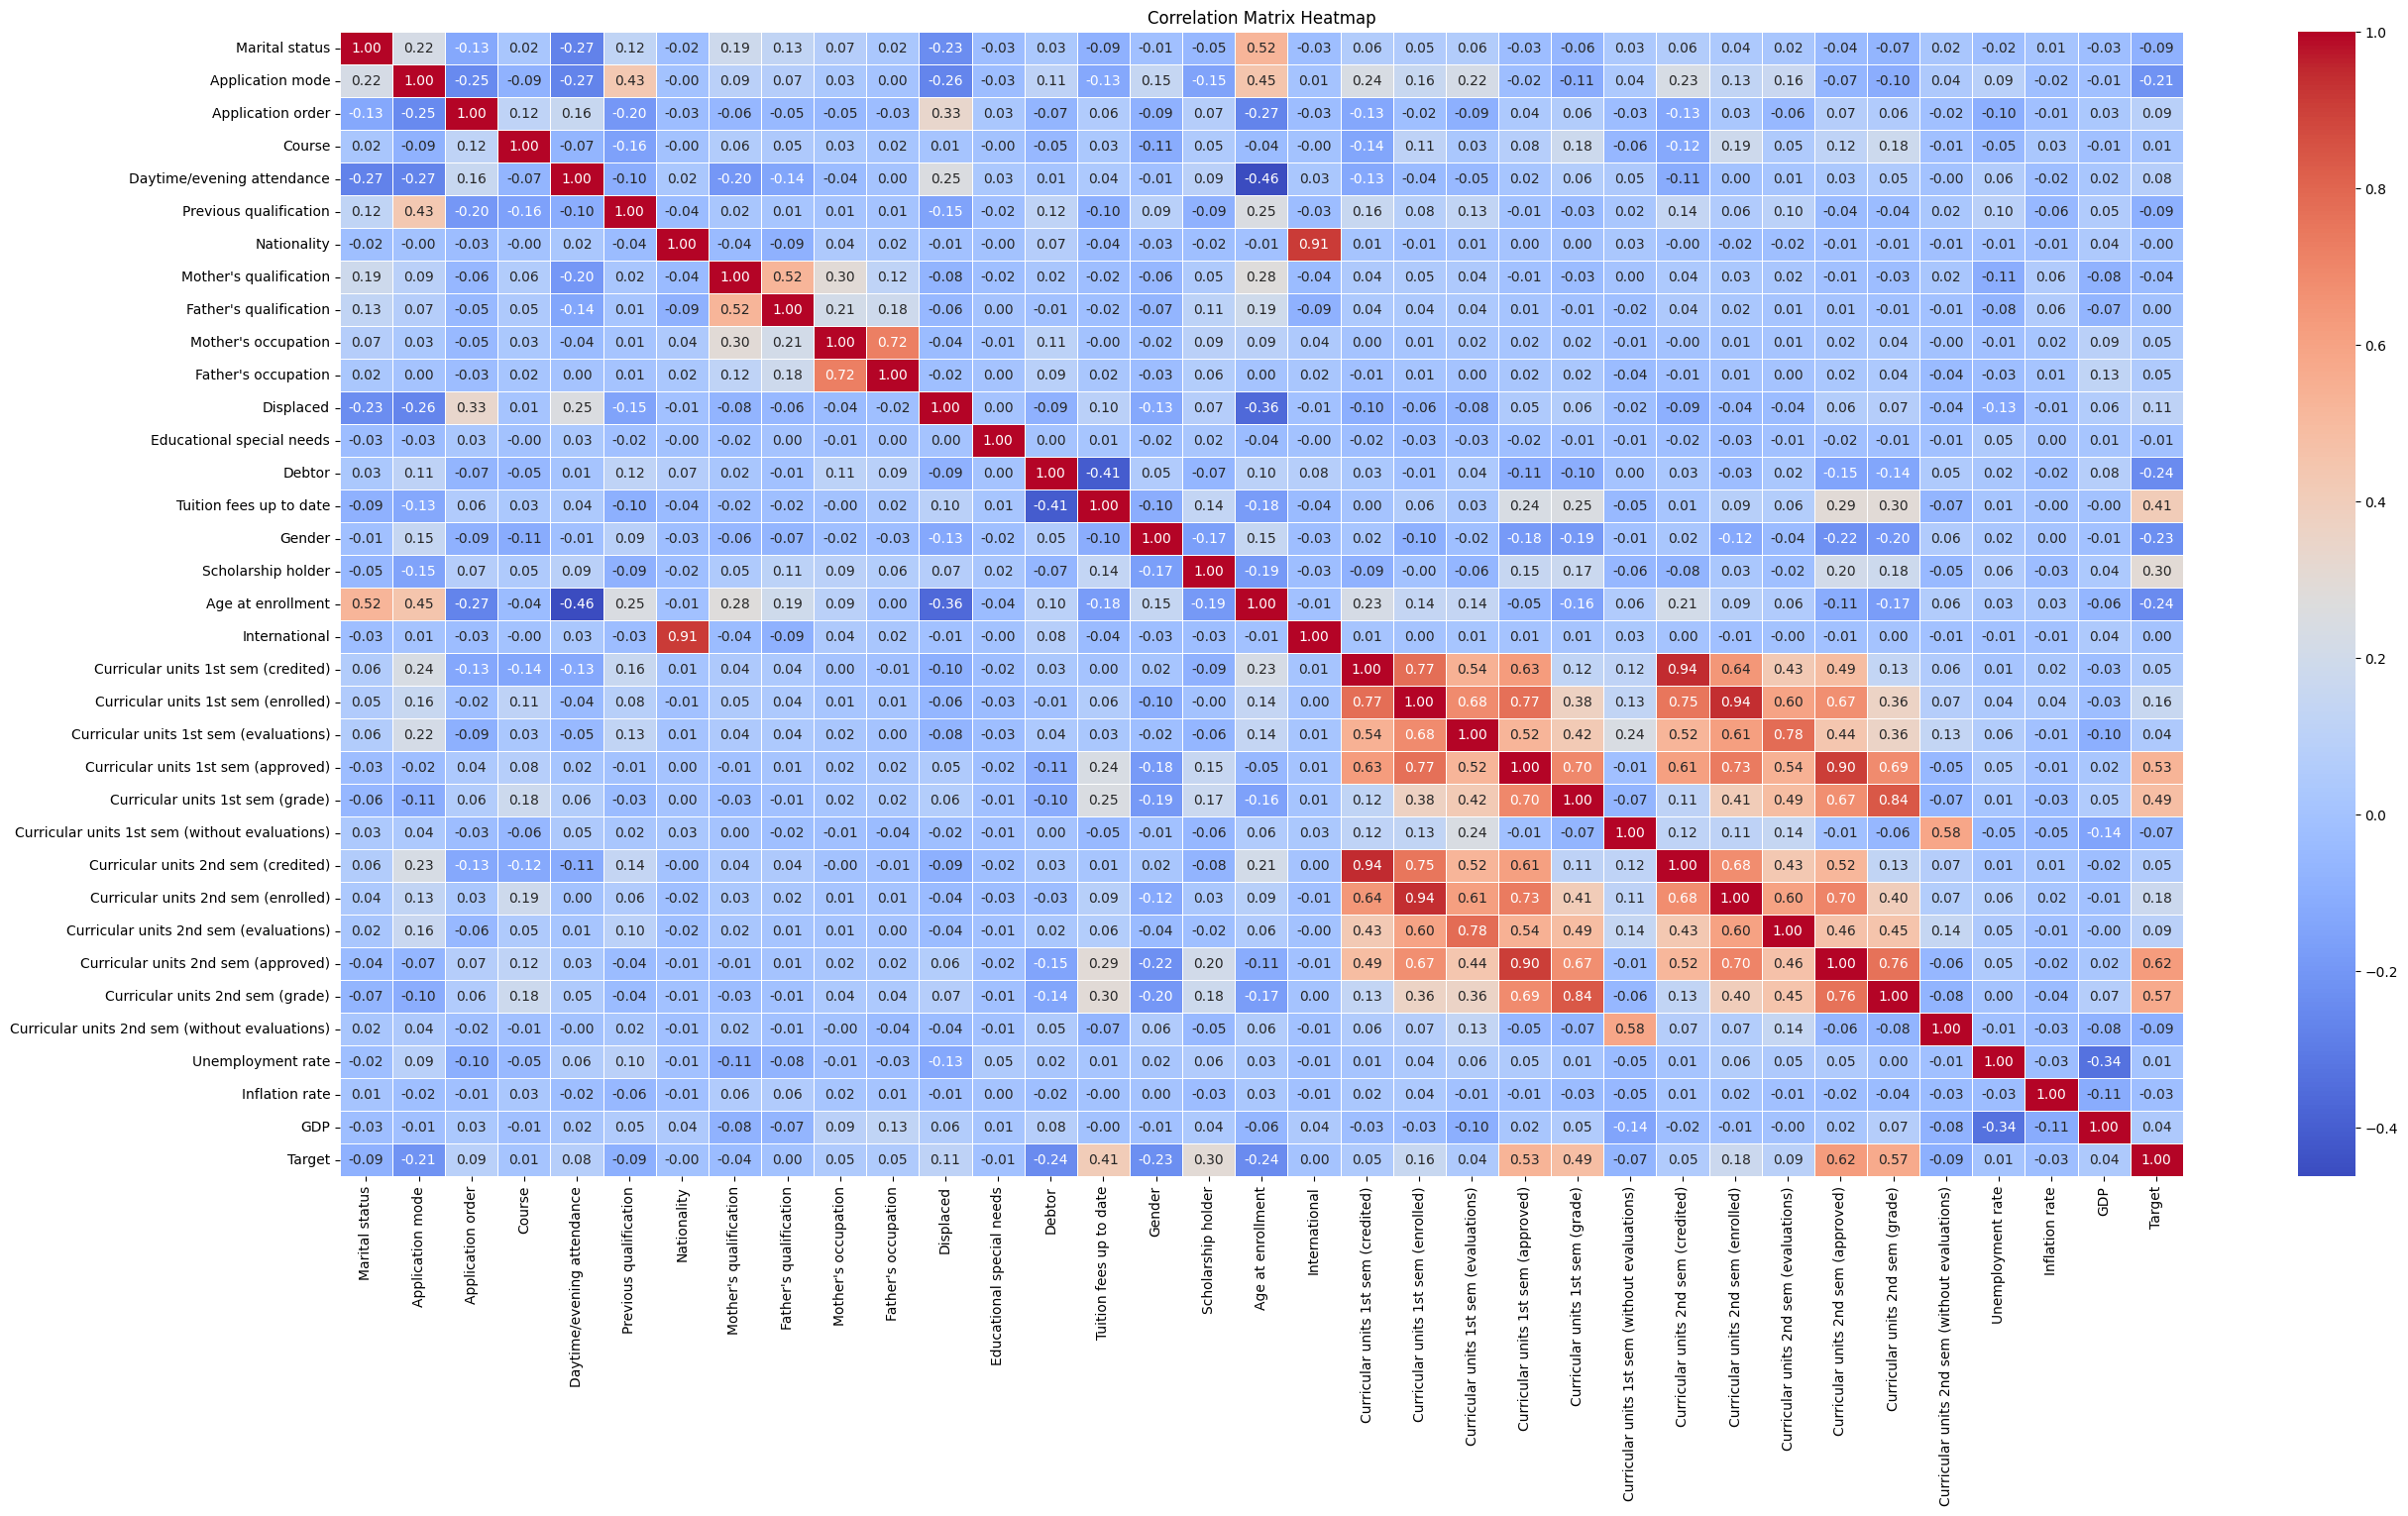

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr_matrix = data.corr()

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(30, 15))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.7)

# Show the plot
plt.title("Correlation Matrix Heatmap")
plt.show()

In [21]:
import pandas as pd

# Create a list to store each course's correlation DataFrame
course_corr_list = []

# Loop through each unique course
for course_id in data['Course'].unique():
    subset = data[data['Course'] == course_id]

    # Only proceed if the subset has enough data
    if subset.shape[0] > 10:
        # Compute correlation with 'Target'
        corr = subset.corr(numeric_only=True)['Target'].drop('Target')

        # Convert to DataFrame and sort
        sorted_corr = corr.reset_index()
        sorted_corr.columns = ['Feature', 'Correlation_with_Target']
        sorted_corr['Course'] = course_id
        sorted_corr = sorted_corr.sort_values(by='Correlation_with_Target', ascending=False)

        course_corr_list.append(sorted_corr)

# Combine all sorted DataFrames
correlation_df = pd.concat(course_corr_list, ignore_index=True)

# Export to Excel
correlation_df.to_excel("correlation_by_course_sorted.xlsx", index=False)

print("Sorted correlation by course saved to 'correlation_by_course_sorted.xlsx'")


Sorted correlation by course saved to 'correlation_by_course_sorted.xlsx'


### 🎓 Why Analyze Correlations by Course?

At first, we calculated correlations between each feature and the `Target` variable (dropout status) for the full dataset. This gave us a general idea of the most influential factors, such as:

- Curricular performance (approved units, grades)
- Tuition payment status
- Scholarship holding

However, when we segmented the data **by course** and recalculated correlations, we found that the most important factors **vary across programs**.

#### ✅ Why this matters:
- **Different programs have different dropout drivers**.
- Helps design **course-specific support strategies**.
- Improves the **relevance and accuracy** of our insights.

This approach gives a more nuanced view of dropout causes, supporting better decision-making and targeted interventions.


# **Working with the cleaned data in Power BI**

In [22]:
data.to_excel("cleaned_student_data.xlsx", index=False)

In [23]:
from google.colab import files
files.download("cleaned_student_data.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [24]:
data.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance,Previous qualification,Nationality,Mother's qualification,Father's qualification,Mother's occupation,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,8,5,2,1,1,1,13,10,6,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,0
1,1,6,1,11,1,1,1,1,3,4,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,2
2,1,1,5,5,1,1,1,22,27,10,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,0
3,1,8,2,15,1,1,1,23,27,6,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,2
4,2,12,1,3,0,1,1,22,28,10,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,2


# **ML models. Prediction Dropout**

In [25]:
print("Shape:", data.shape)
print("\nColumns:\n", data.columns)
print("\nSample data:\n", data.head())

Shape: (4424, 35)

Columns:
 Index(['Marital status', 'Application mode', 'Application order', 'Course',
       'Daytime/evening attendance', 'Previous qualification', 'Nationality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Displaced',
       'Educational special needs', 'Debtor', 'Tuition fees up to date',
       'Gender', 'Scholarship holder', 'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 

# **Random Forest**

In [26]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming 'data' and 'Target' are already defined
X = data.drop(columns=['Target'])
y = data['Target']

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

pipeline_rf_balanced = Pipeline(steps=[
    ('preprocessor', numerical_transformer),
    ('classifier', RandomForestClassifier(class_weight='balanced', random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

pipeline_rf_balanced.fit(X_train, y_train)
y_pred_rf_balanced = pipeline_rf_balanced.predict(X_test)
print("Random Forest Classifier (Balanced Weights) - Classification Report:\n", classification_report(y_test, y_pred_rf_balanced))
print("Random Forest Classifier (Balanced Weights) - Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf_balanced))

Random Forest Classifier (Balanced Weights) - Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.74      0.77       284
           1       0.54      0.36      0.43       159
           2       0.80      0.93      0.86       442

    accuracy                           0.77       885
   macro avg       0.71      0.68      0.69       885
weighted avg       0.75      0.77      0.76       885

Random Forest Classifier (Balanced Weights) - Confusion Matrix:
 [[211  32  41]
 [ 39  57  63]
 [ 12  17 413]]


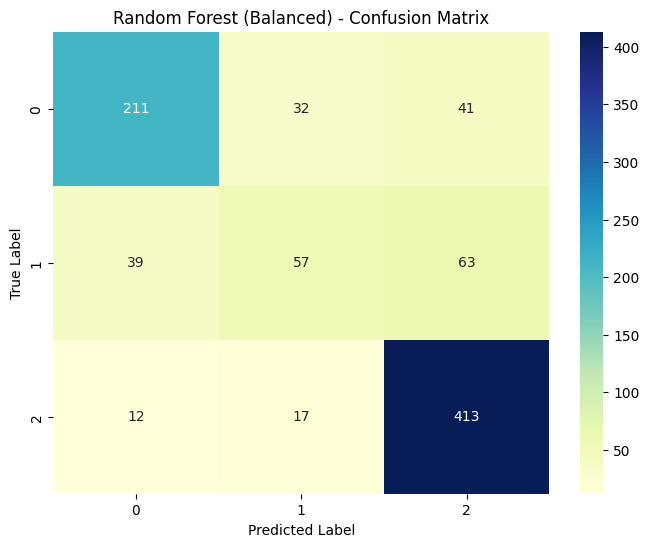

Random Forest Classifier (Balanced Weights) - Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.74      0.77       284
           1       0.54      0.36      0.43       159
           2       0.80      0.93      0.86       442

    accuracy                           0.77       885
   macro avg       0.71      0.68      0.69       885
weighted avg       0.75      0.77      0.76       885

Random Forest Classifier (Balanced Weights) - Confusion Matrix:
 [[211  32  41]
 [ 39  57  63]
 [ 12  17 413]]


In [27]:
X = data.drop(columns=['Target'])
y = data['Target']

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

pipeline_rf_balanced = Pipeline(steps=[
    ('preprocessor', numerical_transformer),
    ('classifier', RandomForestClassifier(class_weight='balanced', random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

pipeline_rf_balanced.fit(X_train, y_train)
y_pred_rf_balanced = pipeline_rf_balanced.predict(X_test)

# ----------------------------------------------------------------------
# Visualize the Confusion Matrix
# ----------------------------------------------------------------------

cm = confusion_matrix(y_test, y_pred_rf_balanced)
class_names = np.unique(y_test)  # Get unique class names

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu",
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Random Forest (Balanced) - Confusion Matrix")  # Specific title
plt.show()

# ----------------------------------------------------------------------
# ----------------------------------------------------------------------

print("Random Forest Classifier (Balanced Weights) - Classification Report:\n",
      classification_report(y_test, y_pred_rf_balanced))
print("Random Forest Classifier (Balanced Weights) - Confusion Matrix:\n",
      confusion_matrix(y_test, y_pred_rf_balanced))

# **In summary, the Random Forest model demonstrates reasonable overall performance, with an accuracy of 77%. The model excelled at predicting graduates (class 2), showing high precision (80%) and excellent recall (93%). This indicates that it was generally accurate when it predicted a student would graduate and correctly identified a large proportion of students who actually did graduate. However, the model struggled significantly with predicting enrolled students (class 1), exhibiting low precision (54%) and recall (36%). This suggests a high rate of misclassification for enrolled students, with many being incorrectly predicted as dropouts or graduates. The prediction of dropouts (class 0) falls somewhere in between, with a precision of 81% and recall of 74%.**

# **Main issue: The model is confused by Enrolled students — they're often predicted as Dropout or Graduate.**

    'Dropout':0,
    'Enrolled':1,
    'Graduate':2

# **Gradient Boosting Classifier**

In [28]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming 'data' and 'Target' are already defined
X = data.drop(columns=['Target'])
y = data['Target']

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

pipeline_gb = Pipeline(steps=[
    ('preprocessor', numerical_transformer),
    ('classifier', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

pipeline_gb.fit(X_train, y_train)
y_pred_gb = pipeline_gb.predict(X_test)
print("\nGradient Boosting Classifier - Classification Report:\n", classification_report(y_test, y_pred_gb))
print("\nGradient Boosting Classifier - Confusion Matrix:\n", confusion_matrix(y_test, y_pred_gb))


Gradient Boosting Classifier - Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.75      0.78       284
           1       0.51      0.37      0.43       159
           2       0.80      0.91      0.85       442

    accuracy                           0.76       885
   macro avg       0.70      0.68      0.69       885
weighted avg       0.75      0.76      0.75       885


Gradient Boosting Classifier - Confusion Matrix:
 [[213  30  41]
 [ 38  59  62]
 [ 13  27 402]]


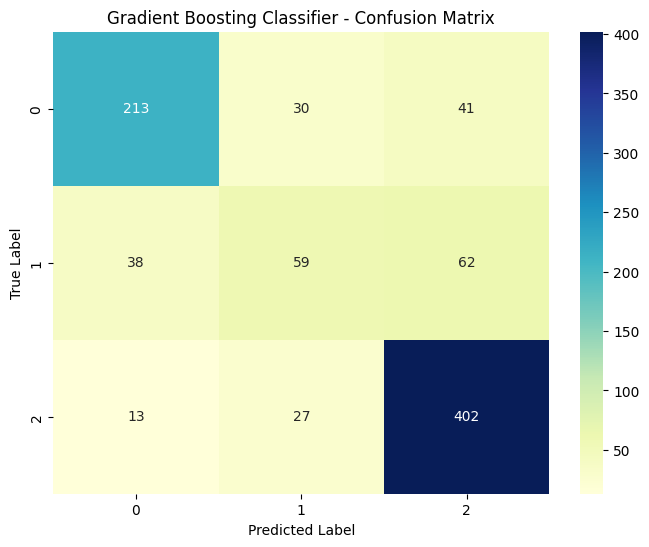


Gradient Boosting Classifier - Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.75      0.78       284
           1       0.51      0.37      0.43       159
           2       0.80      0.91      0.85       442

    accuracy                           0.76       885
   macro avg       0.70      0.68      0.69       885
weighted avg       0.75      0.76      0.75       885



In [29]:

X = data.drop(columns=['Target'])
y = data['Target']

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

pipeline_gb = Pipeline(steps=[
    ('preprocessor', numerical_transformer),
    ('classifier', GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

pipeline_gb.fit(X_train, y_train)
y_pred_gb = pipeline_gb.predict(X_test)

# ----------------------------------------------------------------------
# Visualize the Confusion Matrix
# ----------------------------------------------------------------------

cm = confusion_matrix(y_test, y_pred_gb)
class_names = np.unique(y_test)  # Get unique class names

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu",
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Gradient Boosting Classifier - Confusion Matrix")
plt.show()

# ----------------------------------------------------------------------
# ----------------------------------------------------------------------

print("\nGradient Boosting Classifier - Classification Report:\n", classification_report(y_test, y_pred_gb))

# **Linear Regression**

In [30]:
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
import pandas as pd

# Assuming 'data' and 'Target' are already defined
X = data.drop(columns=['Target'])
y = data['Target']

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

pipeline_linear_svc = Pipeline(steps=[
    ('preprocessor', numerical_transformer),
    ('classifier', LinearSVC(class_weight='balanced', random_state=42, max_iter=10000))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

pipeline_linear_svc.fit(X_train, y_train)
y_pred_linear_svc = pipeline_linear_svc.predict(X_test)
print("Linear SVM Classifier (Balanced Weights) - Classification Report:\n", classification_report(y_test, y_pred_linear_svc))
print("Linear SVM Classifier (Balanced Weights) - Confusion Matrix:\n", confusion_matrix(y_test, y_pred_linear_svc))

Linear SVM Classifier (Balanced Weights) - Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.71      0.75       284
           1       0.48      0.44      0.46       159
           2       0.81      0.89      0.85       442

    accuracy                           0.75       885
   macro avg       0.70      0.68      0.69       885
weighted avg       0.75      0.75      0.75       885

Linear SVM Classifier (Balanced Weights) - Confusion Matrix:
 [[203  44  37]
 [ 36  70  53]
 [ 16  32 394]]


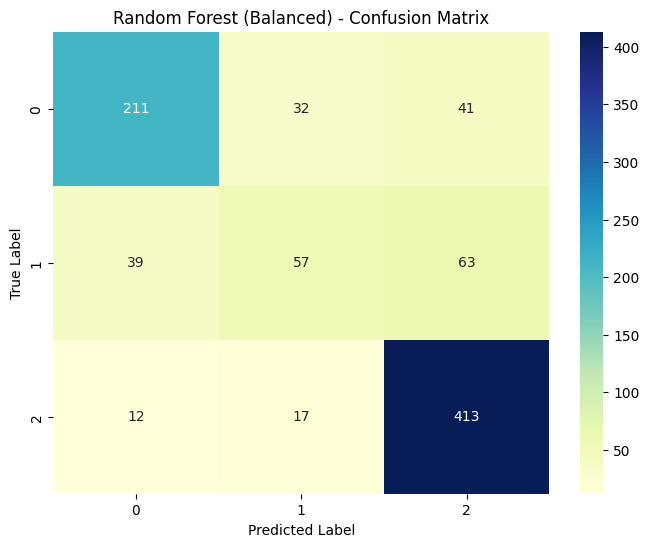

Random Forest Classifier (Balanced Weights) - Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.74      0.77       284
           1       0.54      0.36      0.43       159
           2       0.80      0.93      0.86       442

    accuracy                           0.77       885
   macro avg       0.71      0.68      0.69       885
weighted avg       0.75      0.77      0.76       885

Random Forest Classifier (Balanced Weights) - Confusion Matrix:
 [[211  32  41]
 [ 39  57  63]
 [ 12  17 413]]


In [31]:
X = data.drop(columns=['Target'])
y = data['Target']

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

pipeline_rf_balanced = Pipeline(steps=[
    ('preprocessor', numerical_transformer),
    ('classifier', RandomForestClassifier(class_weight='balanced', random_state=42))
])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

pipeline_rf_balanced.fit(X_train, y_train)
y_pred_rf_balanced = pipeline_rf_balanced.predict(X_test)

# ----------------------------------------------------------------------
# Visualize the Confusion Matrix
# ----------------------------------------------------------------------

cm = confusion_matrix(y_test, y_pred_rf_balanced)
class_names = np.unique(y_test)  # Get unique class names

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu",
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Random Forest (Balanced) - Confusion Matrix")  # Specific title
plt.show()

# ----------------------------------------------------------------------
# ----------------------------------------------------------------------

print("Random Forest Classifier (Balanced Weights) - Classification Report:\n",
      classification_report(y_test, y_pred_rf_balanced))
print("Random Forest Classifier (Balanced Weights) - Confusion Matrix:\n",
      confusion_matrix(y_test, y_pred_rf_balanced))

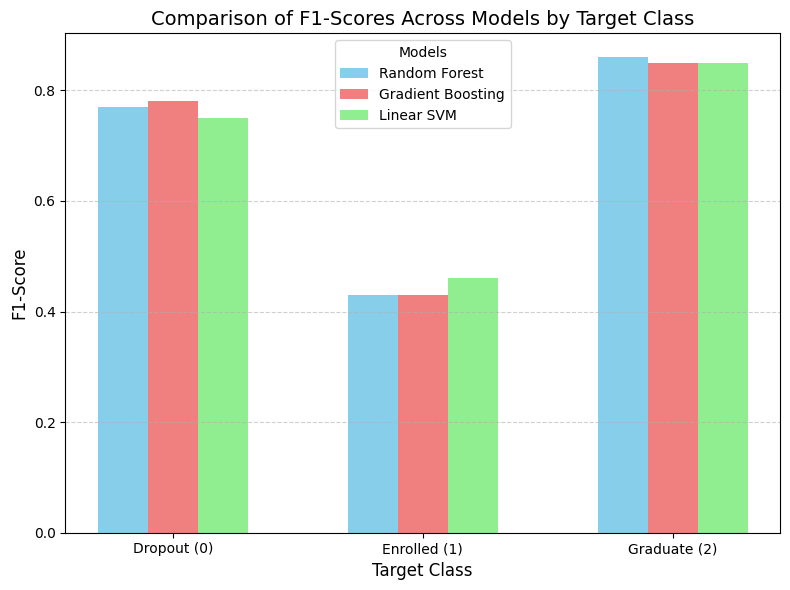

In [32]:
import matplotlib.pyplot as plt
import numpy as np

results = {
    'Dropout (0)': {'Random Forest': 0.77, 'Gradient Boosting': 0.78, 'Linear SVM': 0.75},
    'Enrolled (1)': {'Random Forest': 0.43, 'Gradient Boosting': 0.43, 'Linear SVM': 0.46},
    'Graduate (2)': {'Random Forest': 0.86, 'Gradient Boosting': 0.85, 'Linear SVM': 0.85}
}

classes = list(results.keys())
models = list(next(iter(results.values())).keys())

x = np.arange(len(classes))
width = 0.2
colors = ['skyblue', 'lightcoral', 'lightgreen']

fig, ax = plt.subplots(figsize=(8, 6))

for i, model in enumerate(models):
    model_scores = [results[cls][model] for cls in classes]
    ax.bar(x + i * width, model_scores, width, label=model, color=colors[i])

ax.set_xlabel('Target Class', fontsize=12)
ax.set_ylabel('F1-Score', fontsize=12)
ax.set_title('Comparison of F1-Scores Across Models by Target Class', fontsize=14)
ax.set_xticks(x + width)
ax.set_xticklabels(classes)
ax.legend(title="Models", fontsize=10)
ax.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# ✅ Conclusion

As we saw earlier in the **Distribution of Target Variable** chart, the `Enrolled` category represents only **17% of our dataset**. This is critical because these are the students we are most interested in — we want to know **how many will graduate and how many will drop out**.

To improve prediction accuracy for this group, we would need a **larger sample of enrolled students**. That would make the model more balanced and enhance its performance on the most relevant class.

Despite this limitation, by **splitting the data by academic program**, we were still able to uncover meaningful insights about **which factors most influence dropout** in higher education.

---

## 📊 Explore More in Power BI

Head over to my repository to check out the interactive **Power BI dashboard**, where you can explore how dropout factors vary across different academic programs.  
**Go find them and dive into the data!**
